# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
data_folder = '../data'

training_file = data_folder + '/' + 'train.p'
validation_file=data_folder + '/' + 'valid.p'
testing_file = data_folder + '/' + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.hstack((y_train,y_valid,y_test))))
                                   
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

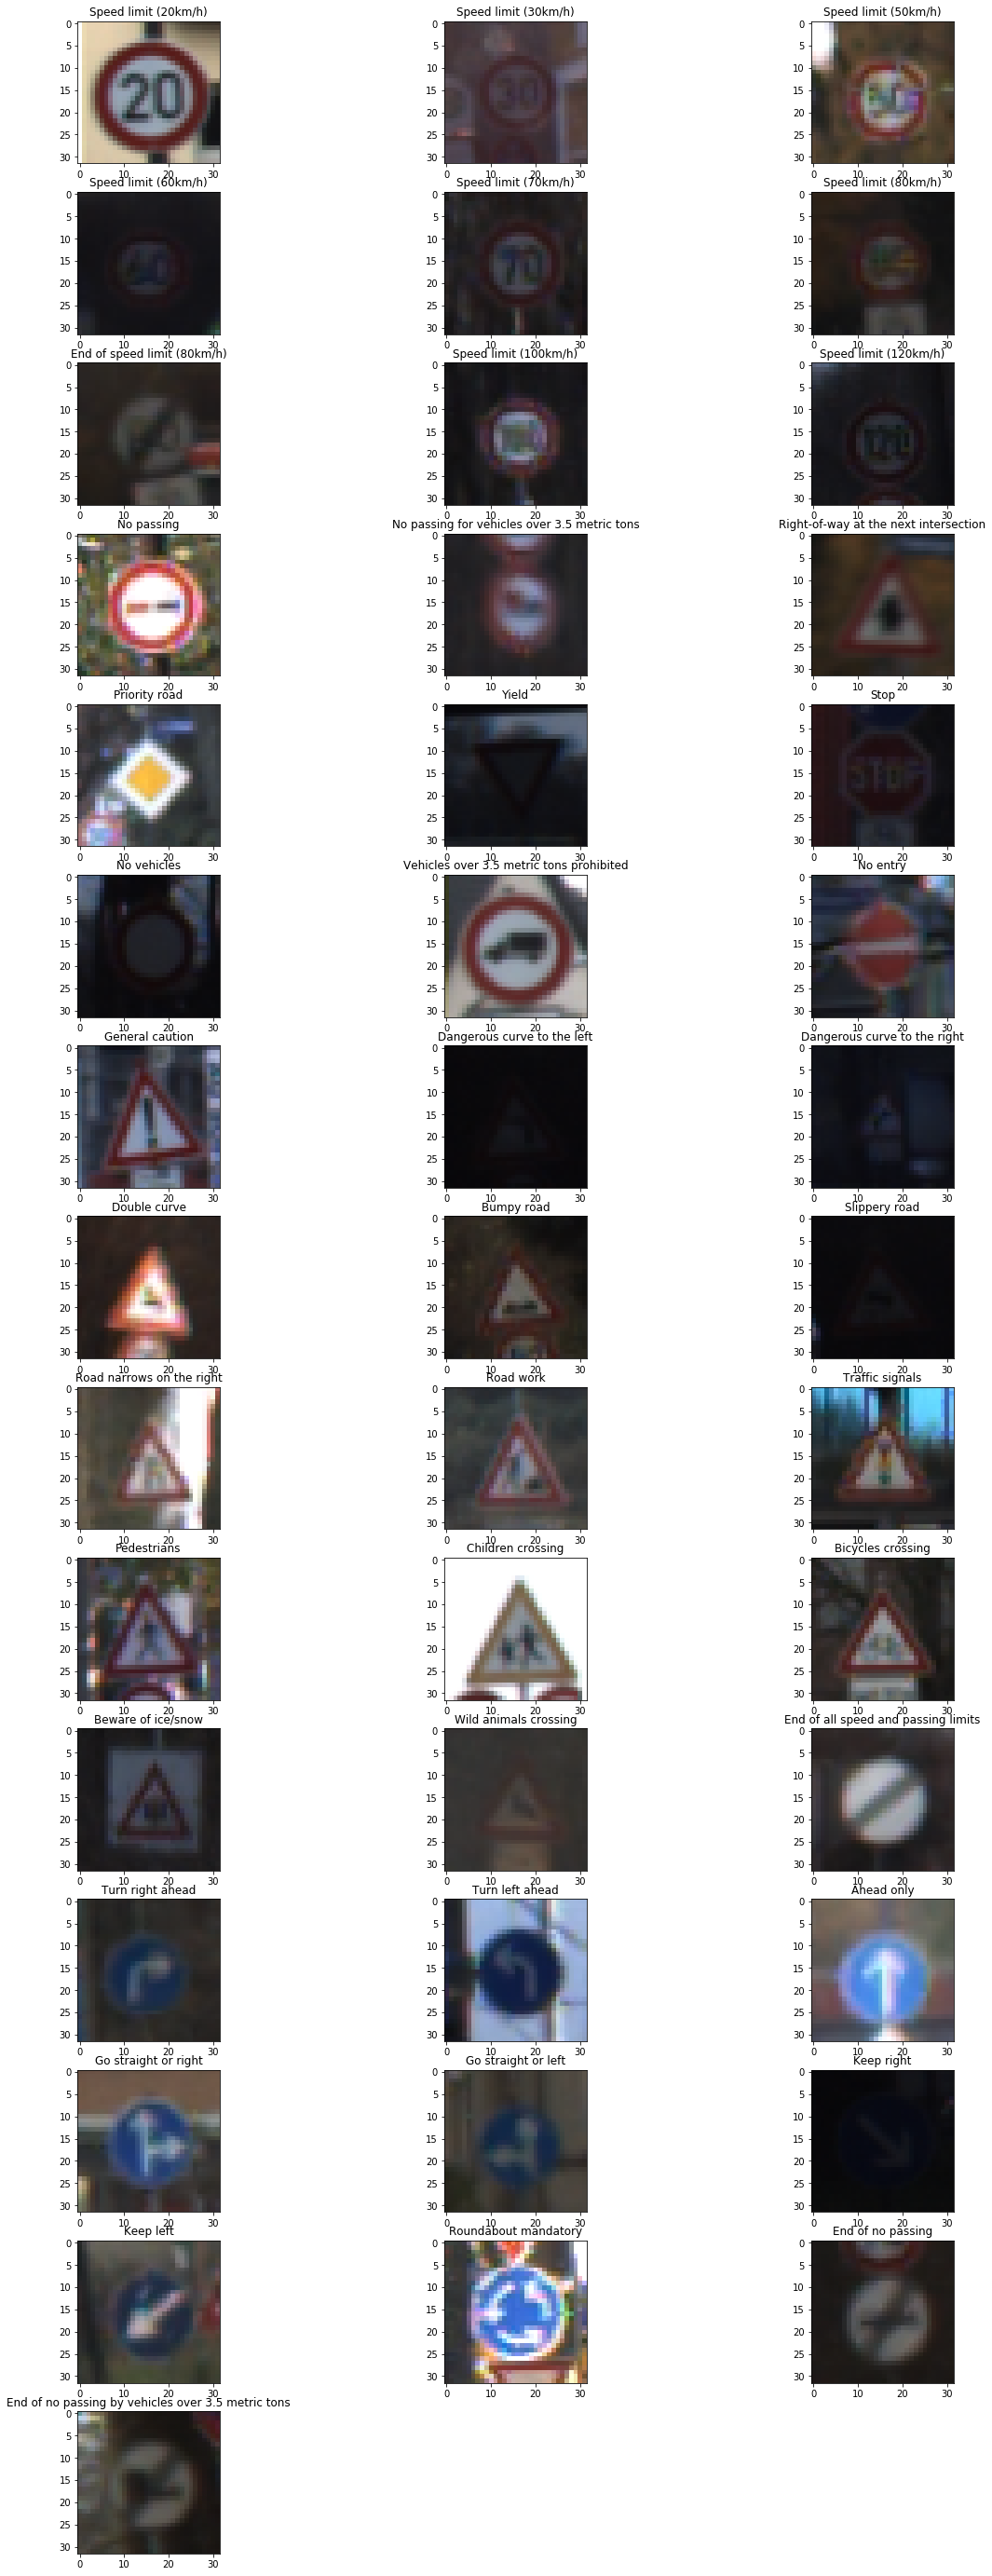

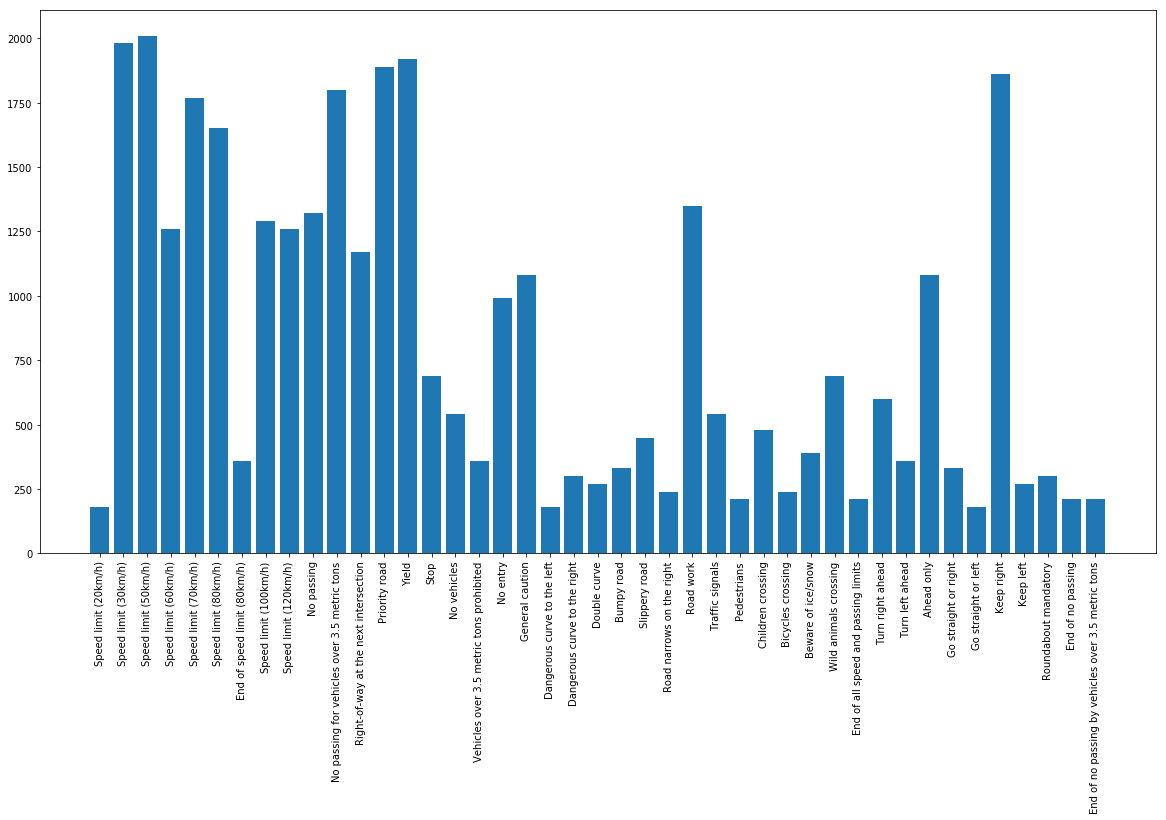

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import pandas as pd

# get labels
label_names = pd.read_csv("signnames.csv") 
label_dict  = dict(label_names.values.tolist())

# Visualizations will be shown in the notebook.
%matplotlib inline
(classes_train, classes_train_firstInd ,n_classes_train) = np.unique(y_train, return_index=True, return_counts=True)
(classes_all_set) = np.unique(np.hstack((y_train,y_valid,y_test)))

# initialize classes for all detected ones
classes_all = range(np.min(classes_all_set),np.max(classes_all_set)+1)
classes_name_all = ['Unknown' for i in range(len(classes_all))]

# match data
n_classes_train_all = np.zeros_like(classes_all)
for i,class_train in enumerate(classes_train):
    n_classes_train_all[class_train] = n_classes_train[i]
    classes_name_all[class_train]    = label_dict[class_train]

# plot first occurence for each label
plots_per_row = 3;
fig, subplt = plt.subplots(np.int_(np.ceil(len(classes_train)/plots_per_row)),plots_per_row,figsize=(20,50))


for cnt in range(len(classes_train)):
    subplt[cnt//plots_per_row][np.mod(cnt,plots_per_row)].imshow(X_train[classes_train_firstInd[cnt]])
    subplt[cnt//plots_per_row][np.mod(cnt,plots_per_row)].set_title(classes_name_all[classes_train[cnt]])
    
for cnt in range(len(classes_train),subplt.shape[0]*subplt.shape[1]):
    subplt[cnt//plots_per_row][np.mod(cnt,plots_per_row)].set_visible(False) 
    
plt.savefig('output_folder/' + 'image_classes.jpg')
plt.show()

# plot data statistics
plt.figure(figsize=(20,10))
plt.bar(classes_all,n_classes_train_all)
plt.xticks(classes_all, classes_name_all,rotation=90)
plt.savefig('output_folder/' + 'histogram_unequal.jpg')
plt.show()




The Dataset shows heavy varying distribution depending on the label. Therefore, the first main task is to balance the number of observations for each label.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In this part the dataset is preprocessed. For the input training data the data is additionally extended so that every label has the same amount of data. This is done by adding modified images of the original data. So this in case the maximum required datapoint amount for each label is 1.5 of the amount of the label with the maximum number of datapoints. Assuming label 2 has just half of it. So we are extending its data by augmenting the existing ones. E.g. augmentation here is scaling, translation, rotation, noise and brightness modifications. These augmentations are randomly combined in order to provide the neural network with a wide range of examples.
After balancing the dataset every image is transformed to gray scale and then its gray-values are normalized from 0:255 to -1:1. This is performed after the image augmentations, as the operations neccessary for that augmentation appear to be easier in standard image format.

Adding 2835 augmented images of class 00 to the training dataset!
Adding 1035 augmented images of class 01 to the training dataset!
Adding 1005 augmented images of class 02 to the training dataset!
Adding 1755 augmented images of class 03 to the training dataset!
Adding 1245 augmented images of class 04 to the training dataset!
Adding 1365 augmented images of class 05 to the training dataset!
Adding 2655 augmented images of class 06 to the training dataset!
Adding 1725 augmented images of class 07 to the training dataset!
Adding 1755 augmented images of class 08 to the training dataset!
Adding 1695 augmented images of class 09 to the training dataset!
Adding 1215 augmented images of class 10 to the training dataset!
Adding 1845 augmented images of class 11 to the training dataset!
Adding 1125 augmented images of class 12 to the training dataset!
Adding 1095 augmented images of class 13 to the training dataset!
Adding 2325 augmented images of class 14 to the training dataset!
Adding 247

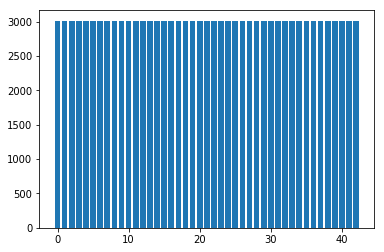

Dataset preprocessed!
Dataset preprocessed!
Dataset preprocessed!

Preprocessing done!



In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Import tensorflow first
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
import random

# used from the tensorflow lesson
# however the color of the image is sutained here in order to exploit the color properties of traffic signs
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -1.0
    b =  1.0
    color_min = 0.0
    color_max = 255.0
    return a + ( ( (image_data - color_min)*(b - a) )/( color_max - color_min ) )

def denormalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -1.0
    b =  1.0
    color_min = 0
    color_max = 255
    return np.copy(color_max + ( ( (image_data - a)*(color_max - color_min) )/( b - a ) )).astype(np.uint8)

def rotZoom(image_data,angle,crop):
    image_center = tuple(np.array(image_data.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    crop_val = \
    int(np.minimum(image_data.shape[0]*(1.0-np.cos(np.absolute(angle*np.pi/180))),\
                   image_data.shape[1]*np.sin(np.absolute(angle*np.pi/180))))
    crop_val = np.maximum(1,crop_val)
    image_out = np.zeros_like(image_data)
    
    result = cv2.warpAffine(image_data, rot_mat, image_out.shape[1::-1], cv2.INTER_AREA)
    if crop > 0:
        result = result[crop_val:(image_out.shape[0]-1-crop_val),crop_val:(image_out.shape[1]-1-crop_val),:]
        image_out = cv2.resize(result,image_out.shape[1::-1], interpolation = cv2.INTER_AREA) 
    else:
        image_out = result
    
    return image_out


def shiftZoom(image_data,x_offs,y_offs,resize):
    crop_val =  int(np.maximum(np.absolute(x_offs),np.absolute(y_offs)))
    crop_val = np.maximum(1,crop_val)
    image_out = np.zeros_like(image_data)
    
    if x_offs >= 0:
        range_x = range(x_offs,np.minimum(image_data.shape[0],image_data.shape[0] - crop_val+x_offs))
        range_x1 = range(0,len(range_x))
    else:
        range_x = range(np.maximum(0,crop_val+x_offs),(image_data.shape[0]+x_offs))
        range_x1 = range((image_data.shape[0]-len(range_x)),image_data.shape[0])
            
    if y_offs >= 0:
        range_y = range(y_offs,np.minimum(image_data.shape[1],image_data.shape[1] - crop_val+y_offs))
        range_y1 = range(0,len(range_y))
    else:
        range_y = range(np.maximum(0,crop_val+y_offs),(image_data.shape[1]+y_offs))
        range_y1 = range((image_data.shape[1]-len(range_y)),image_data.shape[1])
    
    result = image_data  
    if resize > 0:
        result = result[range_x,:,:]  
        result = result[:,range_y,:]   
        image_out = cv2.resize(result,image_out.shape[1::-1],interpolation = cv2.INTER_AREA) 
    else:
        image_out[range_x1,:,:] = result[range_x,:,:]  
        image_out[:,range_y1,:] = result[:,range_y,:]
        
        
    return image_out

def applyZoom(image_data,zoom):
    image_out = np.zeros_like(image_data)
    new_size = (np.int_(image_out.shape[1]*zoom),np.int_(image_out.shape[0]*zoom))
    result = cv2.resize(image_data,new_size,interpolation = cv2.INTER_AREA) 
    if zoom > 1:
        off = int(np.floor(new_size[0] - image_out.shape[1]))
        result2 = result[off:(new_size[0]-off),off:(new_size[0]-off),:]
    else:
        off = int(np.floor(new_size[0] - image_out.shape[1]))
        result2 = np.zeros_like(image_data)
        result2[-off:(-off + new_size[0]),-off:(-off + new_size[0]),:] = result
    
    image_out =  cv2.resize(result2,image_out.shape[1::-1],interpolation = cv2.INTER_AREA) 
    
    
    return image_out

def flipImage(image_data):
    image_out = np.zeros_like(image_data)
    
    range_x = range(image_data.shape[0]-1,-1,-1)
    
    result = image_data
    image_out = result[range_x,:,:]  
        
    return image_out

# appyl gaussian noise to image
# got from https://theailearner.com/2019/05/07/add-different-noise-to-an-image/
def applyNoise(image_data,gain):
    gauss = np.random.uniform(-1,1,image_data.shape)
    
    image_out = np.zeros_like(image_data)
    
    image_out = np.maximum(0.0,np.minimum(255.0,image_data+ 255*gauss*0.01 * gain)).astype(np.uint8)
        
    return image_out

def varyLight(image_data,gain):    
    image_out = np.zeros_like(image_data)
    temp_image = cv2.cvtColor(image_data, cv2.COLOR_RGB2HLS)
    temp_image[:,:,1] = np.maximum(0.0,np.minimum(255.0,np.array(temp_image[:,:,1]).astype(np.float64)*gain)).astype(np.uint8)
    image_out = cv2.cvtColor(temp_image, cv2.COLOR_HLS2RGB)        
        
    return image_out

# equalize count of samples
def balance_dataset(data_in, label_in):
    (classes, n_classes) = np.unique(label_in, return_counts=True)
    data_out = np.copy(data_in)
    label_out = np.copy(label_in)
    for class_ in range(len(n_classes)):        
        
        nb_missing_labels =  int(np.max(n_classes)*1.5) - n_classes[class_] # min. double the numbers
        if nb_missing_labels > 0:
            print("Adding {:04d} augmented images of class {:02d} to the training dataset!".format(nb_missing_labels,classes[class_]))
    
        out_data = np.copy(data_in[classes[class_] == label_in]
                             [np.random.randint(0, n_classes[class_] - 1,nb_missing_labels)])
        
        for ind in range(nb_missing_labels):     
            out_data[ind] = rotZoom(out_data[ind],random.uniform(-15.0,15.0),random.randint(0,1))  
            out_data[ind] = applyNoise(out_data[ind],random.uniform(-3.0,3.0))  
            out_data[ind] = shiftZoom(out_data[ind],random.randint(-4,4),random.randint(-4,4),random.randint(0,1)) 
            out_data[ind] = applyZoom(out_data[ind],random.uniform(1.0,1.1)) 
            out_data[ind] = varyLight(out_data[ind],random.uniform(0.25,1.5))   
                                                
            #out_data[ind] = np.reshape(rand_image,(1,out_data.shape[1],out_data.shape[2],out_data.shape[3]))
        
        data_out = np.vstack((data_out, out_data))
        label_out = np.hstack((label_out, np.ones(nb_missing_labels)*classes[class_]))
    
    (classes, n_classes) = np.unique(label_out, return_counts=True)
    print()
    print("Constant distribution of elements along all classes established")
    plt.bar(classes,n_classes)
    plt.savefig('output_folder/' + 'histogram_unequal.jpg')
    plt.show()
            
    return data_out, label_out

# combine preprocession
def preprocess(data_in, label_in,balance_data):
    data_out = np.copy(data_in)
    label_out = np.copy(label_in)
       
    if balance_data is True:
        data_out, label_out = balance_dataset(data_out, label_out)
        
    for i in range(data_out.shape[0]):
        data_out[i,:,:,0] = cv2.cvtColor(data_out[i],cv2.COLOR_RGB2GRAY)
    
    data_out = data_out[:,:,:,:1]
    
    # Normalize Data
    data_out = normalize(data_out)   
               
    # turn labels into floats
    label_out = label_out.astype(np.float32)
    
    print("Dataset preprocessed!")
    
    return data_out, label_out


X_train_prep_full,y_train_prep_full = preprocess(X_train,y_train,True) # used for training
X_train_prep,y_train_prep = preprocess(X_train,y_train,False) # used for validation
X_valid_prep,y_valid_prep = preprocess(X_valid,y_valid,False) # used for validation too

print()
print("Preprocessing done!")
print()



#### Example plots for image modifications 
Here you can see some of the modifications made to enlarge and balance the input dataset.

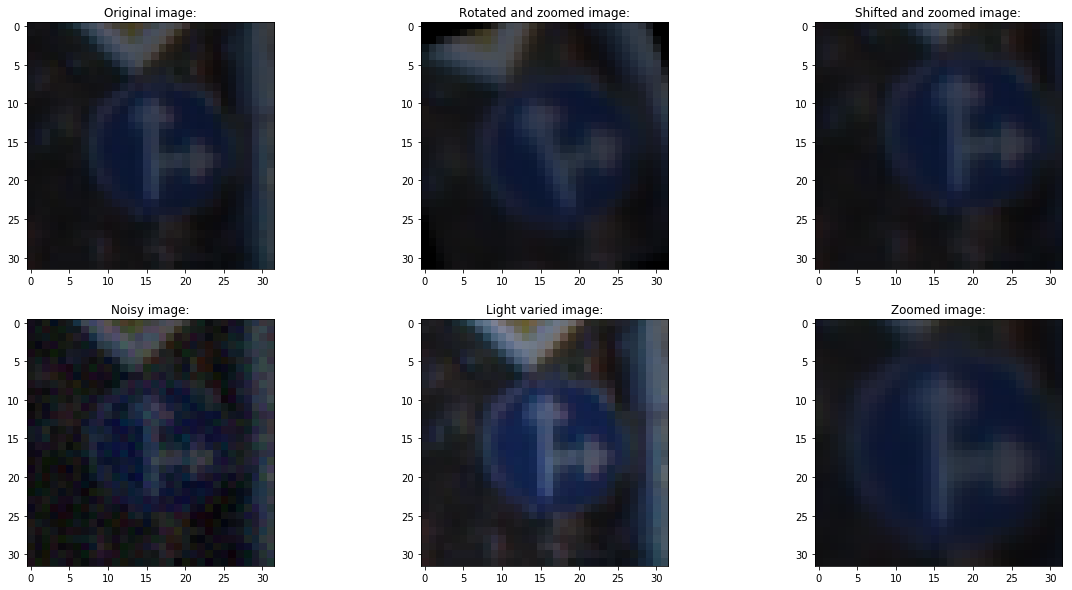

In [5]:
fig, sb = plt.subplots(2,3,figsize=(20,10))
sb[0][0].imshow(X_train[1000])
sb[0][0].set_title("Original image:")
sb[0][1].imshow(rotZoom(X_train[1000],20,1))
sb[0][1].set_title("Rotated and zoomed image:")
sb[0][2].imshow(shiftZoom(X_train[1000],4,-4,1))
sb[0][2].set_title("Shifted and zoomed image:")
sb[1][0].imshow(applyNoise(X_train[1000],4))
sb[1][0].set_title("Noisy image:")
sb[1][1].imshow(varyLight(X_train[1000],1.5))
sb[1][1].set_title("Light varied image:")
sb[1][2].imshow(applyZoom(X_train[1000],1.2))
sb[1][2].set_title("Zoomed image:")
plt.savefig('output_folder/' + 'image_augmented.jpg')
plt.show()

### Model Architecture

As given in (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) a parallel convolution is added which feeds directly values in the fully-connected layers additionally to the known pooling filter. These are the only changes here besides the changes due to label and input size.

In [6]:
## get my data back
#load all libs again
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import pandas as pd
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
import random
from tensorflow.contrib.layers import flatten

# read from pickle
#with open('preprocessed_data.p', 'rb') as f:  # Python 3: open(..., 'wb')
#    X_train_prep_full,y_train_prep_full, X_train_prep,y_train_prep,X_valid_prep,y_valid_prep = pickle.load(f)
    

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.



def LeNet_mod(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1 
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x14.
    conv1_W_bright = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name='conv1_W_bright')
    conv1_b = tf.Variable(tf.zeros(6), name='conv1_b')

    conv1 = tf.nn.conv2d(x[:,:,:,:1], conv1_W_bright, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x14. Output = 14x14x14.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='conv1')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x30
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_W')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    conv2 = tf.nn.relu(conv2,name='conv2')
    
    # SOLUTION: Pooling. Input = 10x10x30. Output = 5x5x30.
    conv2a = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='conv2a')

    # second part of second layer + direct convolution to output
    # in 10x10x16 ; out 5x5x40
    conv2b_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 16, 40), mean = mu, stddev = sigma), name='conv2b_W')
    conv2b_b = tf.Variable(tf.zeros(40), name='conv2b_b')
    conv2b   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 2, 2, 1], padding='VALID') + conv2_b
    conv2b   = tf.nn.relu(conv2b,name='conv2b')
 
    # SOLUTION: Flatten. Input = 30. Output = 750.
    fc0   = tf.concat([flatten(conv2a),flatten(conv2b)],axis=1)
    fc0   = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 750. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 300), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(300), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1,name='fc1')

    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(300, 120), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b  = tf.Variable(tf.zeros(120), name='fc2_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2,name='fc2')

    # SOLUTION: Layer 5: Fully Connected. Input = 200. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma), name='fc3_W')
    fc3_b  = tf.Variable(tf.zeros(43), name='fc1_b')
    logits    = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Preparation

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# load libs again


## properties
BATCH_SIZE = 1024

## init variables
x = tf.placeholder(tf.float32, (None, 32, 32,1),name='x')
y = tf.placeholder(tf.int32, (None),name='y')
one_hot_y = tf.one_hot(y, 43,name='one_hot_y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

## setting up pipeline
rate = 0.001

logits = LeNet_mod(x,keep_prob)
var_nn = tf.trainable_variables() 
lossL2 = tf.add_n([ tf.nn.l2_loss(var)* 0.01 for var in var_nn
                    if '_b' not in var.name ],name='lossL2') 

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits,name='cross_entropy')
loss_operation = tf.reduce_mean(tf.add(cross_entropy,(lossL2/len(var_nn))),name='loss_operation')
optimizer = tf.train.AdamOptimizer(learning_rate = rate,name='optimizer')
training_operation = optimizer.minimize(loss_operation,name='training_operation')

## eval model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1),name='correct_prediction')
eval_net = tf.nn.log_softmax(logits, 1)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),name='accuracy_operation')
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    nb_batches = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_loss += loss
        nb_batches += 1
    return total_loss/nb_batches

#### Training

Training...

EPOCH: 1; Training Accuracy (Aug): 0.121; Training Accuracy: 0.165; Validation Accuracy: 0.131; Loss: 4.045
Improved! Model was saved!

EPOCH: 2; Training Accuracy (Aug): 0.371; Training Accuracy: 0.465; Validation Accuracy: 0.421; Loss: 2.865
Improved! Model was saved!

EPOCH: 3; Training Accuracy (Aug): 0.502; Training Accuracy: 0.651; Validation Accuracy: 0.609; Loss: 2.201
Improved! Model was saved!

EPOCH: 4; Training Accuracy (Aug): 0.592; Training Accuracy: 0.733; Validation Accuracy: 0.688; Loss: 1.831
Improved! Model was saved!

EPOCH: 5; Training Accuracy (Aug): 0.659; Training Accuracy: 0.790; Validation Accuracy: 0.729; Loss: 1.564
Improved! Model was saved!

EPOCH: 6; Training Accuracy (Aug): 0.709; Training Accuracy: 0.839; Validation Accuracy: 0.777; Loss: 1.365
Improved! Model was saved!

EPOCH: 7; Training Accuracy (Aug): 0.740; Training Accuracy: 0.864; Validation Accuracy: 0.804; Loss: 1.226
Improved! Model was saved!

EPOCH: 8; Training Accuracy (Aug): 

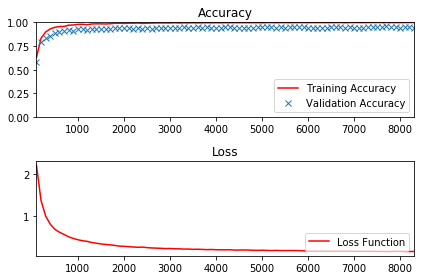

In [59]:
from sklearn.utils import shuffle

# for logging only
target_acc = 0.995
log_batch_step = 100
batch_i = 0
batches = []
train_acc_batch = []
valid_acc_batch = []
loss_batch = []

EPOCHS = 250

last_acc = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train_prep)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_prep_full, y_train_prep_full = shuffle(X_train_prep_full, y_train_prep_full)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_prep_full[offset:end], y_train_prep_full[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
            
            # Log every 50 batches
            batch_i += 1
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = evaluate(X_train_prep, y_train_prep)
                validation_accuracy = evaluate(X_valid_prep, y_valid_prep)
                loss  = evaluate_loss(X_train_prep_full, y_train_prep_full)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)
                loss_batch.append(loss)
            
        training_accuracy_full = evaluate(X_train_prep_full, y_train_prep_full)
        training_accuracy = evaluate(X_train_prep, y_train_prep)
        validation_accuracy = evaluate(X_valid_prep, y_valid_prep)
        loss  = evaluate_loss(X_train_prep_full, y_train_prep_full)
        print("EPOCH: {}; Training Accuracy (Aug): {:.3f}; ".format(i+1,training_accuracy_full) +
              "Training Accuracy: {:.3f}; Validation Accuracy: {:.3f}; ".format(training_accuracy,validation_accuracy) +
              "Loss: {:.3f}".format(loss))
        
        if training_accuracy_full > last_acc:
            saver.save(sess, './lenet' + str(EPOCHS))
            last_acc = training_accuracy_full
            print("Improved! Model was saved!")
            print()
        if (training_accuracy_full > target_acc):
            print()
            print("Required accuracy reached -> terminating the learining process")
            print()
            break
            
            
    
    
fig,acc_plot = plt.subplots(2,1)
acc_plot[0].set_title('Accuracy')
acc_plot[0].plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot[0].plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot[0].set_ylim([0, 1.0])
acc_plot[0].set_xlim([batches[0], batches[-1]])
acc_plot[0].legend(loc=4)
acc_plot[1].set_title('Loss')
acc_plot[1].plot(batches, loss_batch, 'r', label='Loss Function')
acc_plot[1].set_xlim([batches[0], batches[-1]])
acc_plot[1].legend(loc=4)
plt.tight_layout()
plt.show()


#### Testing

In [60]:
# prepare test_data
X_test_prep,y_test_prep = preprocess(X_test,y_test,False)
    

# get test dataset accuracy
with tf.Session() as sess:    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_prep, y_test_prep)
    print("Test-Set Accuracy = {:.3f}".format(test_accuracy))
    print()

Dataset preprocessed!
INFO:tensorflow:Restoring parameters from ./lenet250
Test-Set Accuracy = 0.935



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Image loaded:
Expected Category: Yield


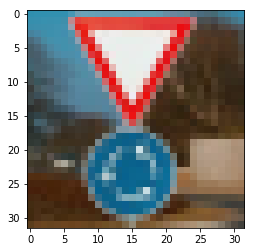



Image loaded:
Expected Category: Speed limit (50km/h)


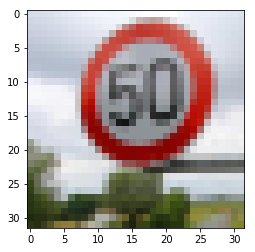



Image loaded:
Expected Category: Road work


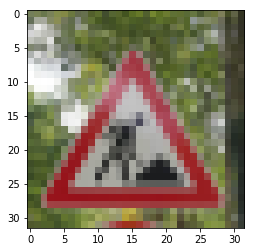



Image loaded:
Expected Category: Priority road


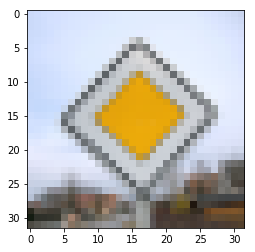



Image loaded:
Expected Category: End of speed limit (80km/h)


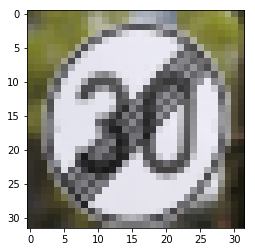



Image loaded:
Expected Category: Roundabout mandatory


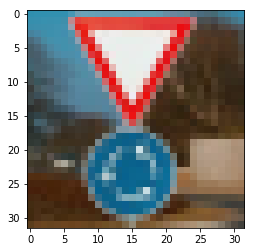

In [65]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
# props
input_path  = "images_usr"

# types
sign_image = []
expected_sign_type = []
predicted_sign_type = []

# get labels
label_names = pd.read_csv("signnames.csv") 
label_dict  = dict(label_names.values.tolist())

# get all files
files = os.listdir(input_path)

for file in files:
    if file[-3:] == 'jpg': ## check if its a jpg
        
        # store image
        img = mpimg.imread(input_path + '/' + file)
        img_resize = cv2.resize(img,image_shape[1::-1],interpolation = cv2.INTER_AREA) 
        sign_image.append(img_resize)
        
        # split filename
        expected_signs_str = str(file[:-4]).split('_')[0].split('-')
        expected_signs = []
        for i in range(len(expected_signs_str)):
            if all(map(str.isdigit, expected_signs_str[i])) is True:
                expected_signs.append(int(expected_signs_str[i]))
        
        if len(expected_signs) > 0:
            expected_sign_type.append(expected_signs)
            print("Image loaded:")
            for i in range(len(expected_signs)):
                print("Expected Category: {}".format(label_dict[expected_signs[i]]))
        else:
            expected_sign_type.append(-1)
            
        plt.imshow(img_resize)
        plt.show()
        
        print()
        print()

# generate np_arrays
sign_image = np.array(sign_image)
expected_sign_type = np.array(expected_sign_type)

### Predict the Sign Type for Each Image

In [66]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# get test dataset accuracy

X_usr_prep,y_usr_prep = preprocess(sign_image,expected_sign_type[:,0],False)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    net_out = sess.run(eval_net, feed_dict={x: X_usr_prep, y: y_usr_prep, keep_prob: 1})
    predicted_sign_type = sess.run(tf.argmax(tf.constant(net_out),1))
    print()
    print("Result:")
    for ii in range(len(predicted_sign_type)):
        print("Expected '{}:{}'; Received: {}:{}".format(expected_sign_type[ii,0],label_dict[expected_sign_type[ii,0]],predicted_sign_type[ii],label_dict[predicted_sign_type[ii]]))
    print()

Dataset preprocessed!
INFO:tensorflow:Restoring parameters from ./lenet250

Result:
Expected '13:Yield'; Received: 25:Road work
Expected '2:Speed limit (50km/h)'; Received: 40:Roundabout mandatory
Expected '25:Road work'; Received: 25:Road work
Expected '12:Priority road'; Received: 12:Priority road
Expected '6:End of speed limit (80km/h)'; Received: 6:End of speed limit (80km/h)
Expected '40:Roundabout mandatory'; Received: 25:Road work



### Analyze Performance

In [63]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_usr_prep, y_usr_prep)
    print()
    print("Accuracy of the user-provided pictures is: {}%.".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from ./lenet250

Accuracy of the user-provided pictures is: 50.0%.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [64]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(sess.run(tf.nn.top_k(tf.constant(net_out), k=3)))

INFO:tensorflow:Restoring parameters from ./lenet250
TopKV2(values=array([[ -4.73299325e-02,  -3.51616859e+00,  -4.23452568e+00],
       [ -1.38482869e-01,  -2.43663859e+00,  -3.64633775e+00],
       [  0.00000000e+00,  -1.80404415e+01,  -2.10816517e+01],
       [ -2.90590018e-04,  -9.17462921e+00,  -9.31636143e+00],
       [  0.00000000e+00,  -2.30033379e+01,  -2.52172012e+01],
       [ -4.73299325e-02,  -3.51616859e+00,  -4.23452568e+00]], dtype=float32), indices=array([[25, 37, 30],
       [40, 38,  2],
       [25, 30, 26],
       [12,  3,  5],
       [ 6,  1, 11],
       [25, 37, 30]], dtype=int32))


# **Traffic Sign Recognition** 

## Writeup

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization.jpg "Visualization"
[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./examples/placeholder.png "Traffic Sign 1"
[image5]: ./examples/placeholder.png "Traffic Sign 2"
[image6]: ./examples/placeholder.png "Traffic Sign 3"
[image7]: ./examples/placeholder.png "Traffic Sign 4"
[image8]: ./examples/placeholder.png "Traffic Sign 5"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the pandas library to calculate summary statistics of the traffic
signs data set:

* The size of training set is ?
* The size of the validation set is ?
* The size of test set is ?
* The shape of a traffic sign image is ?
* The number of unique classes/labels in the data set is ?

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing how the data ...

![alt text][image1]

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to convert the images to grayscale because ...

Here is an example of a traffic sign image before and after grayscaling.

![alt text][image2]

As a last step, I normalized the image data because ...

I decided to generate additional data because ... 

To add more data to the the data set, I used the following techniques because ... 

Here is an example of an original image and an augmented image:

![alt text][image3]

The difference between the original data set and the augmented data set is the following ... 


#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 3x3     	| 1x1 stride, same padding, outputs 32x32x64 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 16x16x64 				|
| Convolution 3x3	    | etc.      									|
| Fully connected		| etc.        									|
| Softmax				| etc.        									|
|						|												|
|						|												|
 


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used an ....

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* training set accuracy of ?
* validation set accuracy of ? 
* test set accuracy of ?

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?
* What were some problems with the initial architecture?
* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to overfitting or underfitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.
* Which parameters were tuned? How were they adjusted and why?
* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

If a well known architecture was chosen:
* What architecture was chosen?
* Why did you believe it would be relevant to the traffic sign application?
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
 

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

![alt text][image4] ![alt text][image5] ![alt text][image6] 
![alt text][image7] ![alt text][image8]

The first image might be difficult to classify because ...

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Stop Sign      		| Stop sign   									| 
| U-turn     			| U-turn 										|
| Yield					| Yield											|
| 100 km/h	      		| Bumpy Road					 				|
| Slippery Road			| Slippery Road      							|


The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%. This compares favorably to the accuracy on the test set of ...

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.

For the first image, the model is relatively sure that this is a stop sign (probability of 0.6), and the image does contain a stop sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .60         			| Stop sign   									| 
| .20     				| U-turn 										|
| .05					| Yield											|
| .04	      			| Bumpy Road					 				|
| .01				    | Slippery Road      							|


For the second image ... 

### (Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1. Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?


